In [1]:
# Basic imports for Numpy and pandas

import numpy as np
import pandas as pd

# Importing the data for District 11 which is a district with top Crime count

crimeDataDistrict11 = pd.read_csv("../Data/crimeDataDistrict11.csv", low_memory=False)

In [2]:
crimeDataDistrict11.head()

,Unnamed: 0,Primary Type,Domestic,District,Year,Latitude,Longitude,Day,Month,Hour,Minute
0,21,BATTERY,0,11.0,2019,41.884925,-87.711121,21,4,6,0
1,23,BATTERY,1,11.0,2019,41.872643,-87.716307,23,4,16,16
2,70,BATTERY,1,11.0,2019,41.901679,-87.721398,23,5,12,0
3,118,BATTERY,0,11.0,2019,41.879293,-87.741485,14,5,0,56
4,137,NARCOTICS,0,11.0,2019,41.899168,-87.709164,27,5,0,58


In [3]:
# Checking the crime count values

print(crimeDataDistrict11['Primary Type'].value_counts())

NARCOTICS              51035
BATTERY                39179
THEFT                  23074
CRIMINAL DAMAGE        16264
ASSAULT                12725
OTHER OFFENSE          10086
ROBBERY                 9105
MOTOR VEHICLE THEFT     7611
BURGLARY                6292
DECEPTIVE PRACTICE      5730
Name: Primary Type, dtype: int64


In [4]:
# Using label encoder for Primary type column

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

crimeDataDistrict11['PrimaryTypeCat'] =  labelencoder_X.fit_transform(crimeDataDistrict11['Primary Type'])

In [5]:
# Label encoding results

crimeDataDistrict11.head()

,Unnamed: 0,Primary Type,Domestic,District,Year,Latitude,Longitude,Day,Month,Hour,Minute,PrimaryTypeCat
0,21,BATTERY,0,11.0,2019,41.884925,-87.711121,21,4,6,0,1
1,23,BATTERY,1,11.0,2019,41.872643,-87.716307,23,4,16,16,1
2,70,BATTERY,1,11.0,2019,41.901679,-87.721398,23,5,12,0,1
3,118,BATTERY,0,11.0,2019,41.879293,-87.741485,14,5,0,56,1
4,137,NARCOTICS,0,11.0,2019,41.899168,-87.709164,27,5,0,58,6


In [40]:
# Preparing Feature and Target varible for the Model

X = crimeDataDistrict11.drop(['Unnamed: 0','Primary Type','District','Domestic','PrimaryTypeCat'], axis=1)
y = crimeDataDistrict11.iloc[:,-1]

In [7]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# smote = SMOTE()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# #oversampling to handle imbalanced data
# Scaler=StandardScaler()
# Scaler.fit(X_train)
# X_train=Scaler.transform(X_train)
# X_test=Scaler.transform(X_test)
# X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [41]:
# Separating Training and Testing set in 75% and 25% ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
# Implementing XGBoost

from numpy import loadtxt
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
# make predictions for test data

y_pred_XGBoost = model.predict(X_test)
predictions = [round(value) for value in y_pred_XGBoost]

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
# Evaluating the Accuracy, Precision and Recall score for the model
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision Score : ",metrics.precision_score(y_test, predictions, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, predictions, average='macro'))

Accuracy: 0.41542980828695114
Precision Score :  0.3140184781354213
Recall Score :  0.22497763894785106


In [30]:
# Naive Baiyes

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [56]:
# make predictions for test data
y_pred_NaiveBayes = gnb.predict(X_test)

# Evaluating the Accuracy, Precision and Recall score for the model
print("Accuracy:", accuracy_score(y_test, y_pred_NaiveBayes))
print("Precision Score : ",metrics.precision_score(y_test, y_pred_NaiveBayes, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred_NaiveBayes, average='macro'))

Accuracy: 0.26146302676914923
Precision Score :  0.12366037699569861
Recall Score :  0.12986563405086965


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

In [50]:
# make predictions for test data
y_pred_SVM = clf.predict(X_test)

# Evaluating the Accuracy, Precision and Recall score for the model
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Precision Score : ",metrics.precision_score(y_test, y_pred_SVM, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred_SVM, average='macro'))

Accuracy: 0.3918411520452337
Precision Score :  0.2593016918990439
Recall Score :  0.21141386126289724


In [42]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rnClf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rnClf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# make predictions for test data
y_predRnclf=rnClf.predict(X_test)

# Evaluating the Accuracy, Precision and Recall score for the model
print("Accuracy:", metrics.accuracy_score(y_test, y_predRnclf))
print("Precision Score : ",metrics.precision_score(y_test, y_predRnclf, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, y_predRnclf, average='macro'))

Accuracy: 0.39270253555967843
Precision Score :  0.26605150306630254
Recall Score :  0.21383196616366584


In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

Accuracy: 0.31184291898577615


In [55]:
# make predictions for test data
y_predLogReg=logreg.predict(X_test)

# Evaluating the Accuracy, Precision and Recall score for the model
print("Accuracy:", accuracy_score(y_test, y_predLogReg))
print("Precision Score : ",metrics.precision_score(y_test, y_predLogReg, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, y_predLogReg, average='macro'))

Accuracy: 0.31184291898577615
Precision Score :  0.08396573364335513
Recall Score :  0.12143348810975985


D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
# Inverse transform to receive the Encoded values again for comparison

y_test = labelencoder_X.inverse_transform(y_test)
predictions = labelencoder_X.inverse_transform(predictions)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
predictions

array(['THEFT', 'BATTERY', 'BATTERY', ..., 'THEFT', 'BATTERY', 'BATTERY'],
      dtype=object)

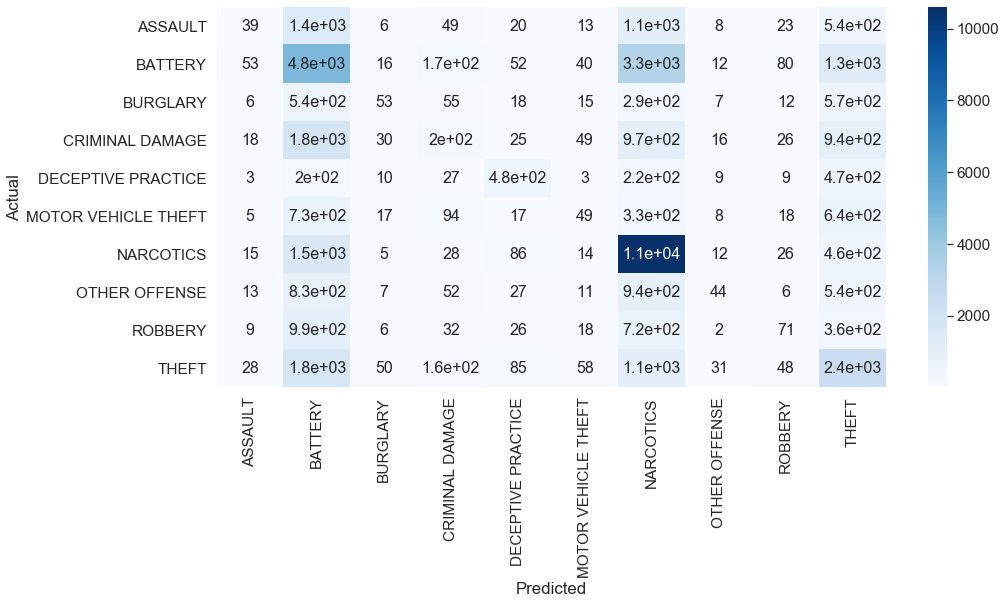

In [27]:
# Confusion Matrix for the XGBoost results

import seaborn as sn
import matplotlib.pyplot as plt

data = metrics.confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [28]:
# Loading the January month data frame for Analysis

janMonthData = pd.read_csv("../Data/janMonthData.csv", low_memory=False)

In [31]:
# Encoding the values for Model

janMonthData['PrimaryTypeCat'] =  labelencoder_X.fit_transform(janMonthData['Primary Type'])

In [32]:
janMonthData.head()

,Primary Type,District,Year,Latitude,Longitude,Day,Month,Hour,Minute,PrimaryTypeCat
0,NARCOTICS,11,2020,41.882140,-87.711045,1,1,21,26,6
1,ASSAULT,11,2020,41.893695,-87.709420,1,1,20,45,0
2,NARCOTICS,11,2020,41.883271,-87.733413,1,1,0,54,6
3,THEFT,11,2020,41.866731,-87.730087,1,1,9,0,9
4,OTHER OFFENSE,11,2020,41.867128,-87.721147,1,1,2,30,7


In [46]:
# Preparing Feature and Target varible for the Model

X_forRF = janMonthData.drop(['Primary Type','District','PrimaryTypeCat'], axis=1)
y_forRF = janMonthData.iloc[:,-1]

In [50]:
# make Predictions using XGBoost

# make predictions for test data
y_pXGBoost = model.predict(X_forRF)
predictionsForJanData = [round(value) for value in y_pXGBoost]

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
# USing Inverse transform to obtain the encoded values

predictionsForJanData = labelencoder_X.inverse_transform(predictionsForJanData)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
type(predictionsForJanData)

numpy.ndarray

In [54]:
# Storing the predicted results in New column

janMonthData['Predicted Result'] = predictionsForJanData 

In [55]:
# Checking the head of new Data

janMonthData.head()

,Primary Type,District,Year,Latitude,Longitude,Day,Month,Hour,Minute,PrimaryTypeCat,Predicted Result
0,NARCOTICS,11,2020,41.882140,-87.711045,1,1,21,26,6,NARCOTICS
1,ASSAULT,11,2020,41.893695,-87.709420,1,1,20,45,0,NARCOTICS
2,NARCOTICS,11,2020,41.883271,-87.733413,1,1,0,54,6,BATTERY
3,THEFT,11,2020,41.866731,-87.730087,1,1,9,0,9,DECEPTIVE PRACTICE
4,OTHER OFFENSE,11,2020,41.867128,-87.721147,1,1,2,30,7,BATTERY


In [56]:
# Store the pre-processed data into CSV for further process

janMonthData.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\predictedResultForJanData.csv')